In [11]:
import numpy as np
from sklearn import svm
f_leftandright = open('leftandright', 'rb')
left_lst = []
right_lst = []
pan_lst = []
tilt_lst = []

for i in range(16139):
  left = f_leftandright.read(4)
  right = f_leftandright.read(4)
  pan = f_leftandright.read(4)
  tilt = f_leftandright.read(4)
  left_lst.append(int.from_bytes(left, byteorder = 'little' ,signed = True))
  right_lst.append(int.from_bytes(right, byteorder = 'little' ,signed = True))
  pan_lst.append(int.from_bytes(pan, byteorder = 'little' ,signed = True))
  tilt_lst.append(int.from_bytes(tilt, byteorder = 'little' ,signed = True))

f_offset = open('offset', 'rb')
panoff_lst = []
tiltoff_lst = []
rotateoff_lst = []
tranoff_lst = []

for i in range(16139):
  panoff = f_offset.read(4)
  tiltoff = f_offset.read(4)
  rotateoff = f_offset.read(4)
  tranoff = f_offset.read(4)
  panoff_lst.append(int.from_bytes(panoff, byteorder = 'little' ,signed = True))
  tiltoff_lst.append(int.from_bytes(tiltoff, byteorder = 'little' ,signed = True))
  rotateoff_lst.append(int.from_bytes(rotateoff, byteorder = 'little' ,signed = True))
  tranoff_lst.append(int.from_bytes(tranoff, byteorder = 'little' ,signed = True))

rotatecom = []
translatecom = []
for i in range(16139):
  rotatecom.append((right_lst[i] - left_lst[i])/2)
  translatecom.append((right_lst[i] + left_lst[i])/2)


In [12]:
size = 15000
test_num = 1000
datanum = 20
purpose_offset = panoff_lst
purpose_value = pan_lst

In [13]:
input_lst = []
input_lst_test = []
for i in range(size - datanum + 1):
  box = []
  for j in range(i, i+datanum, 1):
    box.append(purpose_offset[j])
  if i > size - datanum + 1 - test_num - 1:
    input_lst_test.append(box)
  else : 
    input_lst.append(box)

label_lst = []
label_lst_test = []
for i in range(datanum - 1, size, 1):
  if i > size -  test_num - 1:
    label_lst_test.append(purpose_value[i])
  else:
    label_lst.append(purpose_value[i])


In [14]:
print(len(input_lst), len(input_lst_test))
print(len(label_lst), len(label_lst_test))

13981 1000
13981 1000


In [15]:

# X = [[0., 0.], [1., 1.]]
# y = [0, 1]
n_samples, n_features = 13996, 5





In [16]:
reg = svm.SVR()

In [17]:
reg.fit(input_lst, label_lst)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [18]:
reg.score(input_lst_test, label_lst_test)

-0.12994175192861812

In [19]:
reg.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

R_square : -0.12994175192861657


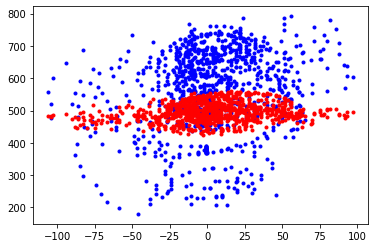

In [20]:
import matplotlib.pyplot as plt

y_hat = reg.predict(input_lst_test)


SSE_lst = 0 
SST_lst = 0

sume = 0
for i in range(len(label_lst_test)):
  sume = sume + label_lst_test[i]

means = float(sume/len(label_lst_test))

for i in range(len(input_lst_test)):
  SSE_lst += (label_lst_test[i] - y_hat[i])**2
  SST_lst += (label_lst_test[i] - means)**2



R_square = 1 - (SSE_lst / SST_lst)

print("R_square :", R_square) 

input_encoded = []
for i in range(len(input_lst_test)):
  input_encoded.append(input_lst_test[i][datanum -1])

plt.plot(input_encoded, label_lst_test, '.', color = 'b') 
plt.plot(input_encoded, y_hat, '.', color = 'r') 

plt.show()

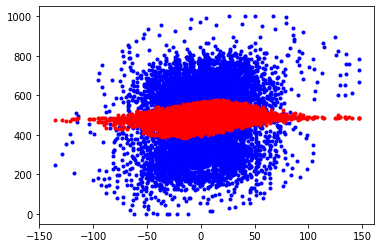

In [21]:
input_encoded = []
for i in range(len(input_lst)):
  input_encoded.append(input_lst[i][datanum -1])
y_hat_2 = reg.predict(input_lst)

plt.plot(input_encoded, label_lst, '.', color = 'b')
plt.plot(input_encoded, y_hat_2, '.', color = 'r')
plt.show()